## Credit

Notes are taken from NLPlanet Practical NLP with Python course section 1.12 Representing Texts as Vectors: Word Embeddings 
* https://www.nlplanet.org/course-practical-nlp/01-intro-to-nlp/11-text-as-vectors-embeddings

Authored by Fabio Chiusano
* https://medium.com/@chiusanofabio94

**All quotes '' are sourced from the NLPlanet course.**

## Word Embeddings

**<u>Word Embeddings:</u>**
* A type of word representation using numerical vectors.
* Similar words can be represented by similar numerical dimensions.
* Vectors can be learned through ML algorithms using large natural language datasets (like corpus).

**<u>Word Embedding Models:</u>**
* Context-independent
    * Word2Vec
    * GloVe
    * FastText
* Context-dependent
    * RNN based (Recurrent Neural Networks)
        * ELMO
        * CoVe
    * Transformer-based
        * BERT
        * XLM
        * RoBERTa
        * ALBERT
 
**<u>Context-independent Embedding:</u>**
* The algorithmically learned word vectors are unique and specific to each word without considering the word's context.
* Different definitions of a word based on context will NOT be differentiated in their vector representation.
* <u>Example:</u>
    * In these two texts:
        * "The chef needs to *season* his appetizers."
        * "The changing *season* brings frosty mornings."
    * The word *season* has the same numerical representation.
* <u>Models:</u>
    * <u>Word2Vec:</u>
        * 'Embeddings are learned by an algorithm involving a two-layer neural network trying to reconstruct linguistic contexts of words.'
        * Can utilize both of these model architectures:
            * <u>Continuous Bag-of-Words (CBOW):</u>
                * 'Model predicts the current word from a window of surrounding context words.'
            * <u>Continuous Skip-Gram:</u>
                * 'Model uses the current word to predict the surrounding window of context words.'
    * <u>GloVe (Global Vectors for Word Representation):</u>
        * The training method learns word embeddings by analyzing how frequently words appear together in a text corpus.
        * By analyzing the co-occurrence patterns of proximal words, the relationships and meanings between words are based on their statistical associations throughout the corpus.
    * <u>FastText:</u>
        * Develop word embeddings by treating words as being composed of character n-grams (each character being a gram/token) rather than a whole, existing word.
        * Embedding in this fashion allows the model to learn unique, uncommon, or non-existent words.
     
**<u>Context-dependent Embedding:</u>**
* Uses methods that 'learn different embeddings for the same word based on its context.'
* <u>Example:</u>
    * In these two texts:
        * "The chef needs to *season* his appetizers."
        * "The changing *season* brings frosty mornings."
    * The word *season* will have a different numerical representation in each sentence.
* <u>RNN based (Recurrent Neural Networks):</u>
    * <u>ELMO (Embeddings from Language Model):</u>
        * Acquires contextual word representations by employing a neural language model. This model processes text by their characters (character-based encoding layer) and integrates two BiLSTM layers for effective context understanding.
            * <u>BiLSTM (Bidirectional Long Short-Term Memory network:</u>
                * A recurrent neural network that processes data both forward and backward. This allows the network to gather information from past and future states relative to a word (Takes previous and upcoming words into account).
    * <u>CoVe (Contextualized Word Vectors):</u>
        * Uses a deep LSTM encoder (RNN used for processing sequential data) created from an attention-driven sequence-to-sequence model. The attention mechanism allows the model to dynamically focus on different parts of a sequence, providing contextualized word vectors.
* <u>Transformer-based:</u>
    * <u>BERT (Bidirectional Encoder Representations from Transformers):</u>
        * 'Transformer-based language representation model trained on a large cross-domain corpus.'
        * This model uses a Masked Language Model (MLM) to randomly mask (or hide) a word(s) in a sequence and train the model to predict the word based on their context in the sequence. Predicting the correct word allows the model to learn contextual understanding and relationships between words.
        * This model also uses Next-Sentence-Prediction (NSP) which involves predicting whether a given pair of sentences are sequential or not. This teaches the model to associate pairs of sentences and understand their logical flow, helping learn relationships and connections between consecutive sentences.
    * <u>XLM (Cross-lingual Language Model):</u>
        * A transformer pre-trained using next-token prediction, a BERT-like MLM, and translation objective (from one language to another).
    * <u>RoBERTa (Robustly Optimized BERT Pretraining Approach): </u>
        * 'Builds on BERT and modifies key hyperparameters, removing the next-sentence pretraining objective and training with much larger mini-batches and learning rates.'
    * <u>ALBERT (A Lite BERT for Self-supervised Learning and Language Representations):</u>
        * 'Presents parameter-reduction techniques to lower memory consumption and increase the training speed of BERT'

## Pre-trained Models and Finetuning

<u>Fit from scratch models:</u>
* CountVectorizer and TfidVectorizer must be trained from scratch to learn word embeddings

<u>Pre-trained Models:</u>
* Word embedding models that are trained once on a large corpus and reused without further training.
* Works best for text that resembles that corpus text from training.
* Open-source trained word embedding models can be found on the Hugging Face Hub.
    * https://huggingface.co/docs/hub/index
 
<u>Finetuning:</u>
* Results in a finetuned model.
* Performing a second training phase on a pre-trained embedding model.
* Useful when the original model will encounter text different from what it was trained on.
* New training material must resemble the text that will be encountered.

## Sentence Embeddings

<u>Sentence Embedding:</u>
* Developing embeddings to represent a sentence or full text.
* One method is 'averaging the vectors of the words composing the sentence.'
* <u>Sentence Transformers Models:</u>
    * Advanced language models capable of producing word and sentence embeddings.
    * Accessed through the *sentence_transformers* library

## Sentence Transformers in Python

In [29]:
# Install sentence_transformers library
!pip install sentence-transformers huggingface-hub

# May require an updated or specific version of huggingface
# Newest version --> pip install --upgrade huggingface-hub
# Specific version --> pip install sentence-transformers huggingface-hub>=0.18.0

In [6]:
# Download an available sentence embedding model
from sentence_transformers import SentenceTransformer, util

model_name = 'all-MiniLM-L6-v2'
model = SentenceTransformer(model_name)
# Pretrained

In [13]:
# Compute embeddings of given sentences
sentences = [
    "Spiderman is a popular web-slinging superhero.",
    "Batman is a rich martial artist vigilante.",
    "New York is the most populated city in the nation."
]

# Compute embeddings
embeddings = model.encode(sentences, convert_to_tensor=True)
# .encode() takes in a list of sentences and represents the given text numerically (embeddings)
# convert_to_tensor=True converts embeddings to tensors (numerical representations suitable for computation in frameworks like PyTorch or TensorFlow)

print(f"""
Embeddings as tensor:
{embeddings}

Embedding shape:
{embeddings.shape}

Note: Different models create vectors of different dimensions.
This model creates vectors with 384 dimensions.
""")


Embeddings as tensor:
tensor([[-0.0344, -0.0788, -0.0801,  ..., -0.0172, -0.0044,  0.0199],
        [ 0.0757,  0.0457, -0.0865,  ..., -0.0764,  0.0746,  0.0237],
        [ 0.1798, -0.0634,  0.0161,  ...,  0.0321,  0.0378,  0.0459]])

Embedding shape:
torch.Size([3, 384])

Note: Different models create vectors of different dimensions.
This model creates vectors with 384 dimensions.



## Definition and Math Review

<u>Cosine Similarity</u>
* A measure used to determine how similar two non-zero vectors are.
* Calculates the cosine angle between the two vectors in multidimensional space.
* <u>Formula:</u>
    * For vectors A and B,
    * cosine similarity = (Dot product of vectors A and B) / (Product of the magnitudes of vectors A and B)
    * OR
    * cosine similarity = (A\*B) / (|A|\*|B|)
* <u>Similarity Score:</u>
    * Ranges from -1 to 1
    * 1: vectors are in the same direction with same orientation
    * 0: vectors are perpendicular and have no similarity
    * -1: vectors are pointing in opposite directions

<u>Dot Product Refresher:</u>
* When multiplying the two vectors, use their dimensional coordinates (recall the x-y plane where coordinates are (x, y)).
* Each coordinate is multiplied by its respective coordinate in the other vector.
* Each product is added.
* <u>Formula:</u>
    * For vectors A and B with n dimensions
        * (x, y): x and y are dimensions (2 dimensional)
    * ((A's 1st dimension) * (B's 1st dimension) + ... + ((A's nth dimension) * (B's nth dimension))
    * OR
    * ∑(from i=1 to n) ((A of i) * (B of i))
i
​

​

* <u>Example: Three dimensional vectors</u>
    * Three dimensional coordinates: (x, y, z)
    * Vector A = (1, 5, 9)
    * Vector B = (4, 6, 3)
    * Dot product: (Ax\*Bx) + (Ay\*By) + (Az*Bz)
    * (1\*4) + (5\*6) + (9\*3)
    * Dot product = 61
 
<u>Magnitude Refresher:</u>
* The size/length of a vector (typically from origin point to vector).
* Derived from the Pythago theorem.rean
    * For a vector with n dimensions:
    * |v| = sqrt((vector's 1st dimension)^2 + ... + (vector's nth dimension)^2)
* <u>Example: Three dimension vector</u>
    * Three dimensional coordinates: (x, y, z)
    * Vector = (7, 8, 2)
    * |v| = sqrt(7^2 + 8^2 + 2^2)
    * |v| = sqrt(49 + 64 + 4)
    * |v| = sqrt(117)
    * OR
    * |v| = 3\*sqrtorem.
* <u>Formula</u>

In [21]:
# Compute cosine similarity between embeddings

similarity_0_1 = util.cos_sim(embeddings[0], embeddings[1])[0].item()
# util.cos_sim(vector1, vector2) calculates the cosine similarity between two given vectors
# Returns as a tensor
# [0] Accesses the first item (This tensor only has 1 item)
# .item() extracts the similarity score as a single floating-point number
print(f"""
Sentence 0: {sentences[0]}
Sentence 1: {sentences[1]}
Similarity: {similarity_0_1}
""")

similarity_0_2 = util.cos_sim(embeddings[0], embeddings[2])[0].item()
print(f"""
Sentence 0: {sentences[0]}
Sentence 2: {sentences[2]}
Similarity: {similarity_0_2}
""")


Sentence 0: Spiderman is a popular web-slinging superhero.
Sentence 1: Batman is a rich martial artist vigilante.
Similarity: 0.39904776215553284


Sentence 0: Spiderman is a popular web-slinging superhero.
Sentence 2: New York is the most populated city in the nation.
Similarity: 0.03916462883353233



## Embeddings from Different Models

<u>MTEB:</u>
* A benchmark used for measuring the performance of an embedding model in various embedding tasks.

## Deducing Information from Similarity Scores

In [26]:
sentences = [
    "White",
    "Red"
]

embeddings = model.encode(sentences, convert_to_tensor=True)
print(f"""
Similarity: {util.cos_sim(*embeddings)[0].item()}
Returns a high score because 'White' and 'Red' are both colors, but different colors.
""")
# *embeddings uses all embeddings inside of the embeddings tensor


Similarity: 0.6289807558059692
Returns a high score because 'White' and 'Red' are both colors, but different colors.



In [28]:
sentences = [
    "Some people are heroes.",
    "Some people are not heroes.",
]

embeddings = model.encode(sentences, convert_to_tensor=True)
print(f"""
Similarity: {util.cos_sim(*embeddings)[0].item()}
Returns a high similarity even though the sentences convey contradictory information.
This is because these embedding models are trained to learn representations based on the word's context.
Words that appear in similar contexts in the training corpus will have high similarity scores.
Therefore the embedding models base similarity more on sentence structure rather than logic.
""")


Similarity: 0.8417174816131592
Returns a high similarity even though the sentences convey contradictory information.
This is because these embedding models are trained to learn representations based on the word's context.
Words that appear in similar contexts in the training corpus will have high similarity scores.
Therefore the embedding models base similarity more on sentence structure rather than logic.



## Visualizing Embeddings

In [30]:
# Imports

from huggingface_hub import hf_hub_download
# Used for downloading files from the Hugging Face model hub

from sentence_transformers import SentenceTransformer, util
# SentenceTransformer is a sentence embedding model
# util contains functions used to work with embeddings

import pandas as pd
# Used for data manipulation and analysis

import numpy as np
# Used for numerical computing and working with array and matrices

from sklearn.decomposition import PCA 
# PCA (Principal Component Analysis) is a class
# A technique for dimensionality reduce
# Used to reduce high-dimensional data to its important information

from sklearn.manifold import TSNE 
# TSNE (t-Distributed Stochastic Neighbor Embedding) is a class
# Used for visualizing high-dimensional data

# Visualization
import plotly.express as px
# High-level interface used for plots and charts
import plotly.io as pio
# Used for handling input and output for Plotly visualizations (including saving or displaying)

In [ ]:
# May need to download dataset of Medium articles
!git clone https://huggingface.co/datasets/fabiochiu/medium-articles

In [31]:
# Download and organize data

df_articles = pd.read_csv(
    hf_hub_download(
        "fabiochiu/medium-articles", # Repository
        repo_type="dataset", # Type of content being fetched
        filename="medium_articles.csv" # File to be downloaded
    ) 
    # Downloads dataset from the Hugging Face model hub
)
# Reads a csv file into a Pandas DataFrame

# Keep 200 articles about Data Science and 200 articles about Business
df_articles = pd.concat([
    df_articles[df_articles["tags"].apply(lambda taglist: "Data Science" in taglist)][:200],
    df_articles[df_articles["tags"].apply(lambda taglist: "Business" in taglist)][:200]
]).reset_index(drop=True)
# pd.concat concatenates subsets into a single DataFrame
# .reset_index(drop=True) resets the index of the resulting DataFrame to start from 0 and drops the previous index
# df_articles["tags"] refers to the "tags" column of the DataFrame
# .apply applies a function to each element in the specified column
# lambda function takes the article's taglist and returns True if the string is in the taglist

df_articles.head()

,title,text,url,authors,timestamp,tags
0,Essential OpenCV Functions to Get You Started ...,"Reading, writing and displaying images\n\nBefo...",https://towardsdatascience.com/essential-openc...,['Juan Cruz Martinez'],2020-06-12 16:03:06.663000+00:00,"['Artificial Intelligence', 'Python', 'Compute..."
1,Data Science for Startups: R -> Python,Source: Yuri_B at pixabay.com\n\nOne of the pi...,https://towardsdatascience.com/data-science-fo...,['Ben Weber'],2018-06-11 20:58:09.414000+00:00,"['Startup', 'Python', 'Data Science', 'Towards..."
2,How to Customize QuickSight Dashboards for Use...,We have been getting a lot of queries on how t...,https://medium.com/zenofai/how-to-customize-qu...,['Engineering Zenofai'],2019-12-04 11:46:34.298000+00:00,"['Analytics', 'AWS', 'Big Data', 'Data Science..."
3,The answer is blowing in the wind: Harnessing ...,"By Glenn Fung, American Family Insurance data ...",https://medium.com/amfam/the-answer-is-blowing...,['American Family Insurance'],2020-06-12 16:41:36.697000+00:00,"['Machine Learning', 'Data Science', 'AI', 'Ar..."
4,Working Together to Build a Big Data Future,To leverage Big Data and build an effective Ar...,https://medium.com/edtech-trends/working-toget...,['Alice Bonasio'],2017-11-15 11:12:51.254000+00:00,"['Fintech', 'Artificial Intelligence', 'AI', '..."


In [32]:
# Download the sentence embedding model
model = SentenceTransformer('all-MiniLM-L6-v2')

In [34]:
# Simplify and embed

# Concatenate title and text of articles
df_articles["full_text"] = df_articles["title"] + " " + df_articles["text"]

# Compute embedding
embeddings = model.encode(df_articles["full_text"].values, convert_to_tensor=True)
print(f"{embeddings.shape}\n400 items, each embedded with 384 dimensions")


torch.Size([400, 384])
400 items, each embedded with 384 dimensions


In [35]:
# Reduce the embedding's dimensionality

# Reduce from 384 to 50 dimensions (fast)
PCA_obj = PCA(n_components=50)
# PCA() creates a PCA object that reduces the data to a specified number of dimensions
# n_components=50 reduces the data to 50 dimensions
embeddings_pca = PCA_obj.fit_transform(embeddings)
# .fit_transform() fits the PCA model to the embeddings 
# and transforms it into a new set of data with reduced dimensions

# Reduce from 50 dimensions to 2 dimensions (slow, but good for visualization)
embeddings_tsne = TSNE(n_components=2, perplexity=6.0).fit_transform(embeddings_pca)
# TSNE() creates a t-SNE object that reduces the dimensions for visualization
# n_components=2 reduces the data to 2 dimensions
# perplexity determines the number of neighbors to consider when reducing dimensionality
# low perplexity values lead to a more local view of data
# higher perplexity values lead to a more global view of data
# .fit_transform() fits the t-SNE model to the input data

In [87]:
# Use Plotly to create a scatter plot using the 2 dimensional data Pt.1

# Set Plotly Renderer
pio.renderers.default = "plotly_mimetype+notebook_connected"

# Data Preparation
x_dimension, y_dimension = list(zip(*embeddings_tsne))
# Separate embeddings into their elements
titles = df_articles["title"].values

df_tsne = pd.DataFrame(data={
    "x": x_dimension, # x coords
    "y": y_dimension, # y coords
    "title": titles, # plot title
    "color": ["color" for _ in x_dimension] # Appends the string "color" to each x_dimension element
    # Arbitrary placeholder 
}) 
# ^ contains all information to plot
# ^ tells where each plot is and what to display

print(f"DataFrame Structure:\n{df_tsne}")

DataFrame Structure:
             x          y                                              title  \
0    40.482689 -39.905319  Essential OpenCV Functions to Get You Started ...   
1    39.288055   1.471333             Data Science for Startups: R -> Python   
2    55.148682  13.244123  How to Customize QuickSight Dashboards for Use...   
3    31.519981 -22.189631  The answer is blowing in the wind: Harnessing ...   
4     8.129389  -9.644473        Working Together to Build a Big Data Future   
..         ...        ...                                                ...   
395 -40.878834  -9.919047  3 Meaningful Ways to Begin Your Business While...   
396 -29.147718   0.730702  Why Startups Need To Follow the Hard Product Path   
397 -55.668663   1.275517             How To Be A Successful Business Owner?   
398 -39.964878 -13.823313  How I Launched a Successful Gig Business with ...   
399   9.640692  -1.358822  A Layman’s Guide to Data Science: How to Becom...   

     color  
0    

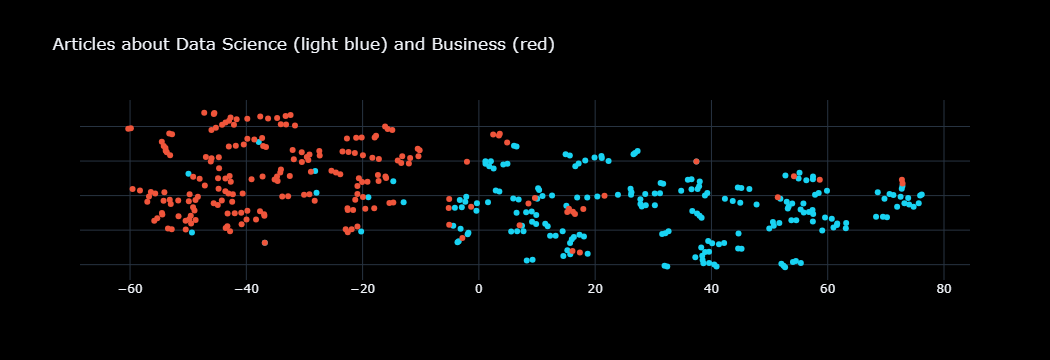

In [88]:
# Use Plotly to create a scatter plot using the 2 dimensional data Pt.2

# Plot Construction
labels = {
    "x": "", # label for x-axis
    "y": "", # label for y-axis
    "color": "" # label for the color representation in the plot
}
hover_data = {
    "x": False, 
    "y": False,
    "color": True
}
# ^ specifies what information is displayed when hovering over points in a plot 
# ^ all true or false: setting to false will stop that information from appearing 
color_discrete_map = {
    "color": [
        px.colors.qualitative.Plotly[5] # light blue
        if i < len(x_dimension) / 2 # assigns light blue to first half of data points
        else px.colors.qualitative.Plotly[1] # red
        for i in range(len(x_dimension)) # assigns red to second half of data points
    ]
}
# ^ creates a list of colors for the "color" attribute in the x_dimension 
# ^ colors the plots on the graph
# ^ px.colors.qualitative.Plotly is a color palette list
title = "Articles about Data Science (light blue) and Business (red)"
fig = px.scatter(
    df_tsne, # DataFrame containing data to be plotted
    x="x", # Determines column from DataFrame for x-coords
    y="y", # Determines column from DataFrame for y-coords
    hover_name="title", # Determines the column from DataFrame used to label points
    labels=labels, # Sets axis labels and legend title
    hover_data=hover_data, # Controls what information is displayed when hovering over data points
    color="color", # Determine column from DataFrame to assign a color to each point
    color_discrete_map=color_discrete_map, # Maps discrete colors to specific data values
    height=400, # Sets height of the plot
    template="plotly_dark", # Chooses theme (dark) for the plot
    title=title # Sets the title of the plot
)
fig.update_yaxes(showticklabels=False)
fig.update_xaxes(zeroline=False)
fig.update_yaxes(zeroline=False)
fig.update_layout(showlegend=False)
fig.update_layout({
    "plot_bgcolor": "black",
    "paper_bgcolor": "black"
})
# ^ change background colors

# Display Plot
fig.show()

## Bag of Words vs Embeddings: Pros and Cons

<u>Bag of Words:</u>
* Models must be fit on a training set.
* Cannot disambiguate homonyms (same word multiple meanings).
* can be faster than embedding.

<u>Embeddings:</u>
* Can use pre-trained models mostly without further training.
* Can be fine-tuned on a specific dataset with the benefits of being priorly trained on an extensive dataset.
* Can disambiguate homonyms (same word multiple meanings) with unique embeddings.
    * Specifically context-dependent embedding models.
* Embeddings from neural models require more processing power (slower than vectorizers).